In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,128,128,16,16,16,16,16,2,1,1,0,0,0,0,287.87,288.66,289.45,288.24
1,128,128,16,16,16,16,16,2,1,1,0,0,0,1,241.13,247.84,248.27,247.49
2,128,128,16,16,16,16,16,2,1,1,0,0,1,1,148.12,149.99,149.90,150.14
3,128,128,16,16,16,16,16,2,1,1,0,1,0,0,301.40,302.43,302.70,301.94
4,128,128,16,16,16,16,16,2,1,1,0,1,1,0,244.74,251.80,252.15,251.04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
MWG          200000 non-null int64
NWG          200000 non-null int64
KWG          200000 non-null int64
MDIMC        200000 non-null int64
NDIMC        200000 non-null int64
MDIMA        200000 non-null int64
NDIMB        200000 non-null int64
KWI          200000 non-null int64
VWM          200000 non-null int64
VWN          200000 non-null int64
STRM         200000 non-null int64
STRN         200000 non-null int64
SA           200000 non-null int64
SB           200000 non-null int64
Run1 (ms)    200000 non-null float64
Run2 (ms)    200000 non-null float64
Run3 (ms)    200000 non-null float64
Run4 (ms)    200000 non-null float64
dtypes: float64(4), int64(14)
memory usage: 27.5 MB


In [28]:
df['MWG'].value_counts()

128    82729
64     62466
32     39121
16     15684
Name: MWG, dtype: int64

In [5]:
list1 = df.columns

In [6]:
len(list1)

18

In [7]:
X = df[list1[0:14]]
X.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,128,128,16,16,16,16,16,2,1,1,0,0,0,0
1,128,128,16,16,16,16,16,2,1,1,0,0,0,1
2,128,128,16,16,16,16,16,2,1,1,0,0,1,1
3,128,128,16,16,16,16,16,2,1,1,0,1,0,0
4,128,128,16,16,16,16,16,2,1,1,0,1,1,0


In [8]:
corr = X.corr()
corr

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
MWG,1.000000,0.001051,0.009029,0.105391,-0.008573,0.158692,0.015913,0.000872,0.353168,-0.001284,0.001054,0.000206,-0.001419,-0.000209
NWG,0.001051,1.000000,0.009568,-0.006963,0.105328,0.014930,0.158350,0.000145,-0.001766,0.354439,0.001662,-0.000050,0.001333,0.000345
KWG,0.009029,0.009568,1.000000,0.147256,0.149286,-0.034504,-0.034516,-0.000664,-0.012001,-0.011291,0.001232,0.000378,0.001429,0.001780
MDIMC,0.105391,-0.006963,0.147256,1.000000,-0.209356,0.196806,0.084195,-0.001425,-0.136008,0.010672,0.000681,0.001640,0.000600,0.002301
NDIMC,-0.008573,0.105328,0.149286,-0.209356,1.000000,0.083896,0.196434,-0.002619,0.012576,-0.133261,-0.000696,-0.000477,0.000015,-0.002284
MDIMA,0.158692,0.014930,-0.034504,0.196806,0.083896,1.000000,0.087593,0.000678,-0.203317,-0.019162,-0.001546,0.001096,0.000936,0.000320
NDIMB,0.015913,0.158350,-0.034516,0.084195,0.196434,0.087593,1.000000,-0.001316,-0.017708,-0.202883,0.001330,0.000159,-0.000687,-0.001990
KWI,0.000872,0.000145,-0.000664,-0.001425,-0.002619,0.000678,-0.001316,1.000000,-0.000111,0.001201,0.000150,-0.000960,-0.000850,-0.001140
VWM,0.353168,-0.001766,-0.012001,-0.136008,0.012576,-0.203317,-0.017708,-0.000111,1.000000,-0.000071,0.001724,-0.001590,-0.001095,-0.002057
VWN,-0.001284,0.354439,-0.011291,0.010672,-0.133261,-0.019162,-0.202883,0.001201,-0.000071,1.000000,0.000178,0.000425,-0.000569,0.001277


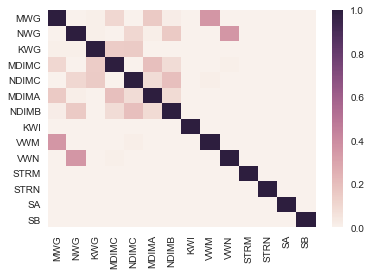

In [9]:
sns.heatmap(corr,vmax=1,vmin=0)

In [11]:
adabr = AdaBoostRegressor(DecisionTreeRegressor())

In [12]:
Y = df[list1[14:18]]
Y.head()

,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,287.87,288.66,289.45,288.24
1,241.13,247.84,248.27,247.49
2,148.12,149.99,149.90,150.14
3,301.40,302.43,302.70,301.94
4,244.74,251.80,252.15,251.04


In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=.25,random_state=42)

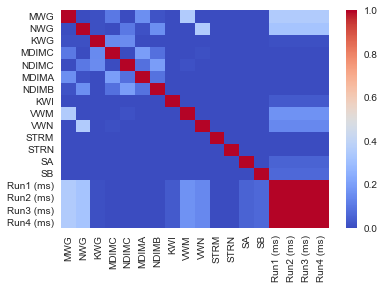

In [14]:
sns.heatmap(df.corr(),vmax=1,vmin=0,cmap='coolwarm')

In [15]:
df_te = pd.read_csv('test.csv')
X_te = df_te[list1[0:14]]
X_te.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,64,64,32,8,8,8,8,8,8,8,1,0,0,1
1,64,64,32,8,8,8,8,8,8,4,1,1,0,0
2,64,64,32,8,8,8,8,8,8,2,1,1,0,1
3,64,64,32,8,8,8,8,8,8,2,1,0,1,0
4,64,64,32,8,8,8,8,8,8,2,1,0,0,1


In [16]:
adabr.fit(X,Y['Run1 (ms)'])
pre1 = adabr.predict(X_te)

In [17]:
adabr.fit(X,Y['Run2 (ms)'])
pre2 = adabr.predict(X_te)

In [18]:
adabr.fit(X,Y['Run3 (ms)'])
pre3 = adabr.predict(X_te)

In [19]:
adabr.fit(X,Y['Run4 (ms)'])
pre4 = adabr.predict(X_te)

In [20]:
#ans = metrics.mean_squared_error(Y_test['Run1 (ms)'],pre1)+metrics.mean_squared_error(Y_test['Run2 (ms)'],pre2)+metrics.mean_squared_error(Y_test['Run3 (ms)'],pre3)+metrics.mean_squared_error(Y_test['Run4 (ms)'],pre4)
#math.sqrt(ans/4)

In [21]:
df_ans = pd.DataFrame(df_te['Id'],columns=['Id'])
df_ans[list1[14]]=pre1
df_ans.head()

,Id,Run1 (ms)
0,Id_1,151.38
1,Id_2,271.90
2,Id_3,194.72
3,Id_4,196.46
4,Id_5,165.03


In [22]:
df_ans[list1[15]]=pre2

In [23]:
df_ans.head()

,Id,Run1 (ms),Run2 (ms)
0,Id_1,151.38,151.23
1,Id_2,271.90,272.11
2,Id_3,194.72,192.16
3,Id_4,196.46,196.02
4,Id_5,165.03,165.45


In [24]:
df_ans[list1[16]]=pre3
df_ans[list1[17]]=pre4
df_ans.head()

,Id,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,Id_1,151.38,151.23,151.20,151.29
1,Id_2,271.90,272.11,272.11,271.87
2,Id_3,194.72,192.16,192.87,194.67
3,Id_4,196.46,196.02,196.15,196.50
4,Id_5,165.03,165.45,164.93,164.65


In [25]:
#df_ans.to_csv('Answer.csv',index=False)

In [27]:
models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_train, Y_train)
    
    predictions = model.predict(X_test)
    
    # Evaluate the model
    rmse = math.sqrt(metrics.mean_squared_error(predictions, Y_test))
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(rmse)
    names.append(name)
    
    msg = "%s: (%f)" % (name, rmse)
    print(msg)

LiR: (286.501004)
Ridge: (286.501002)
Lasso: (286.504825)
ElasticNet: (287.272442)


ValueError: bad input shape (150000, 4)